In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
%matplotlib inline

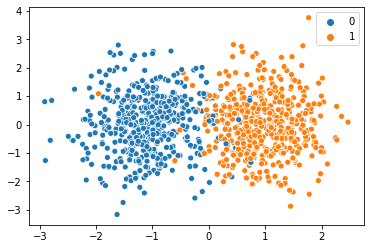

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

In [3]:
x[:20]

array([[-1.86861197,  0.97277734],
       [ 0.94790441,  1.64545526],
       [-0.89667718,  0.13085479],
       [ 1.07041848, -1.10127033],
       [ 0.64828013, -1.26494759],
       [-1.05829743, -1.70604372],
       [-0.70323384,  0.55461647],
       [-1.13794204,  1.908745  ],
       [-0.56199639,  1.79515398],
       [ 2.24799728, -0.46355951],
       [-0.77801517, -1.4425683 ],
       [ 0.12350293,  0.52567182],
       [ 1.16935351,  0.11064847],
       [-0.6200348 ,  0.15515123],
       [ 1.10869155, -0.33842538],
       [ 0.0599369 ,  0.0093694 ],
       [-1.06748867,  0.03302178],
       [-0.77164691,  1.5879939 ],
       [ 0.48370423, -1.00700756],
       [-0.43549066,  0.6013974 ]])

In [4]:
y[:20]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [5]:
class logistic_regression:
    def sigmoid(self,x): return 1/(1+np.exp(-x))
    def __init__(self,features=2):
        self.features=features
        self.weights=np.random.rand(features)
        self.bias=0.
    def compute_cost(self,y,y_hat):
        term1=np.sum(np.multiply(y,np.log(1-y_hat)))
        term2=np.sum(np.multiply(1-y,np.log(y_hat)))
        return -(term1+term2)/len(y)
    def fit(self,x,y,print_every_nth_epoch=100,learning_rate=0.01,epochs=1000):
        assert x.shape[1]==self.features,"Invalid number of features."
        assert x.shape[0]==y.shape[0],"unequal number of sizes"
        n=x.shape[0]
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            y_hat=self.sigmoid(y_hat)
            diff=y-y_hat
            grad_w=+np.dot(x.T,diff)*learning_rate/n
            self.weights-=grad_w
            grad_b=+np.sum(diff)*learning_rate/n
            self.bias-=grad_b
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------- {} epoch -------> loss={} ----------".format((epoch+1),self.compute_cost(y,y_hat)))
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred>0.5,1,0)
        diff=np.abs(y-pred)
        return(sum(diff)/len(diff))
    def predict(self,x):
        return self.sigmoid(np.dot(x,self.weights)+self.bias)

In [6]:
model=logistic_regression()
model.fit(x,y,)

--------- 100 epoch -------> loss=1.064610539444311 ----------
--------- 200 epoch -------> loss=0.8730828455659058 ----------
--------- 300 epoch -------> loss=0.7011010911590394 ----------
--------- 400 epoch -------> loss=0.5663457846166419 ----------
--------- 500 epoch -------> loss=0.4708143904917066 ----------
--------- 600 epoch -------> loss=0.4058248496602025 ----------
--------- 700 epoch -------> loss=0.36216972455983376 ----------
--------- 800 epoch -------> loss=0.3333672099409672 ----------
--------- 900 epoch -------> loss=0.31534111417343746 ----------
--------- 1000 epoch -------> loss=0.30544355143790747 ----------


In [7]:
model.evaluate(x_test,y_test)

0.916

In [8]:
x1=np.arange(-5,6,0.1)
x2=np.arange(-5,4,0.1)

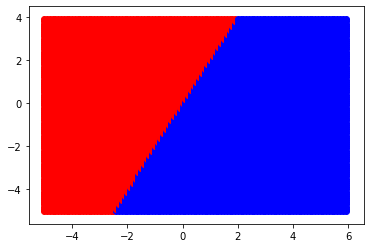

In [9]:
for i in range(len(x1)):
    for j in range(len(x2)):
        pred=model.predict([np.array(np.array([x1[i],x2[j]]))])[0]
        if(pred>0.5):
            plt.scatter(x1[i],x2[j],c='r')
        else:
            plt.scatter(x1[i],x2[j],c='b')
plt.show()

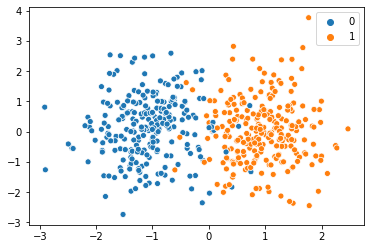

In [10]:
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));